# Effects of Bike Hiring
## By Sadiq Ghalib

## Investigation Overview

> I selected Ford GoBike dataset in order to investigate bike hiring by different people. There are a lot of different variables and our main focus is to define the most common variables which affect the bike hiring on the project.


## Dataset Overview

> - There are many variables in the data within 16 different variables representing different data such as (age, gender, days, duration, and others). The data also contains approximately 3.31 billion records.

> - Data exploration and focus on the ages and found that the age range is large (18-140) years and there are extreme values ​​in it, so the focus was on the largest proportion, which represents 95% and was in the range of ages (18-60) years.

> - The company also deployed the service in more than one city and it is difficult to focus on all of them and by examining the data we found it better to choose the city of San Francisco to provide large data in it, so the city limits were adopted through the longitude and latitude and focus on. 


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
dataFrame = pd.read_csv('mergeData.csv')

## Age Distrubition of Users

> Here is the distrubition of users. Ages from 18 to 60 takes 95% of the users.
Some of the users entered their ages incorrectly.

Text(0.5, 0, 'Age bike riders')

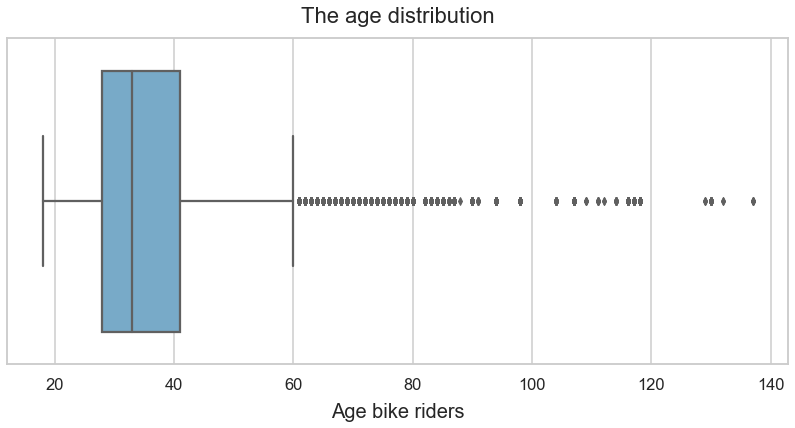

In [5]:
# Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

# Filter data to include reasonable member age range
dataFrame['member_age'] = 2018-dataFrame['member_birth_year']

plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=dataFrame, palette='Blues', orient='h')
plt.title("The age distribution", fontsize=22, y=1.03)
plt.xlabel("Age bike riders", fontsize=20, labelpad=10)

## Monthly Trend of Bike Users

> The service is clearly affected by the seasons, so the use of the service decreases in winter and increases in other seasons.

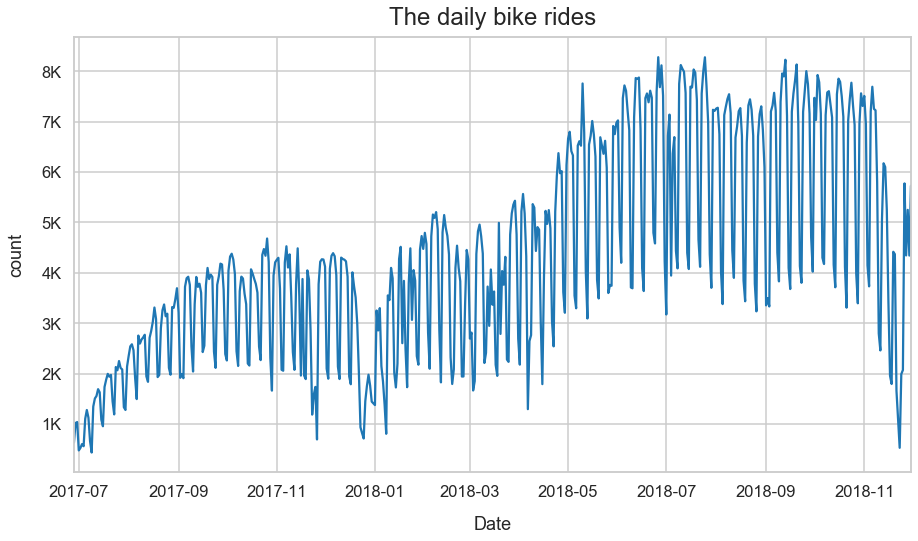

In [12]:
# Create new fields for date from start_time and end_time
dataFrame['start_time']=pd.to_datetime(dataFrame['start_time'])
dataFrame['end_time']=pd.to_datetime(dataFrame['end_time'])
dataFrame['start_time_date']=dataFrame['start_time'].dt.date
dataFrame['end_time_date']=dataFrame['end_time'].dt.date
dataFrame['start_time_year_month']=dataFrame['start_time'].map(lambda x: x.strftime('%Y-%m'))
dataFrame['end_time_year_month']=dataFrame['end_time'].map(lambda x: x.strftime('%Y-%m'))
dataFrame['start_time_year_month_renamed'] = dataFrame['start_time'].dt.strftime('%y' + '-' + '%m')
dataFrame['start_time_year']=dataFrame['start_time'].dt.year.astype(int)
dataFrame['end_time_year']=dataFrame['end_time'].dt.year.astype(int)
dataFrame['start_time_month']=dataFrame['start_time'].dt.month.astype(int)
dataFrame['end_time_month']=dataFrame['end_time'].dt.month.astype(int)
dataFrame['start_time_hour_minute']=dataFrame['start_time'].map(lambda x: x.strftime('%H-%m'))
dataFrame['end_time_hour_minute']=dataFrame['end_time'].map(lambda x: x.strftime('%H-%m'))
dataFrame['start_time_hour']=dataFrame['start_time'].dt.hour
dataFrame['end_time_hour']=dataFrame['end_time'].dt.hour
dataFrame['start_time_weekday']=dataFrame['start_time'].dt.weekday_name
dataFrame['end_time_weekday']=dataFrame['end_time'].dt.weekday_name
dataFrame['start_time_weekday_abbr']=dataFrame['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
dataFrame['end_time_weekday_abbr']=dataFrame['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

def transform_axis(dailyBike, pos):
    if dailyBike >= 1000:
        value = int(dailyBike/1000)
        return '{:d}K'.format(value)
    elif dailyBike >= 1000000: 
        value = int(dailyBike/1000000)
        return '{:d}M'.format(value)
    else:
        return int(dailyBike)

dataFrame.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,8))
plt.title('The daily bike rides', fontsize=24, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('count', labelpad=16)
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

## Monthly Trend of Age Groups

> 20-30 years old users are rapidly growing compared to other user groups. When the service first started 30-40 years old users were dominant, however 20-30 years old users became leader in a year.

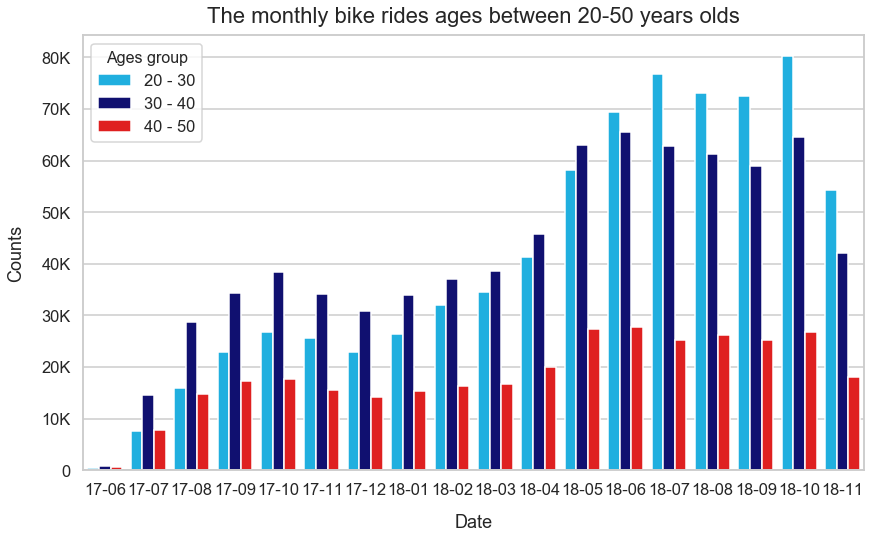

In [13]:
# Create a new field for member age group from member_age_bin
dataFrame['member_age_bins'] = dataFrame['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

plt.figure(figsize=(14,8))
palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'red'}
axis = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=palette, data=dataFrame[dataFrame['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly bike rides ages between 20-50 years olds', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Counts', labelpad=16)
legs = axis.legend()
legs.set_title('Ages group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

## Gender of Users

(0, 100)

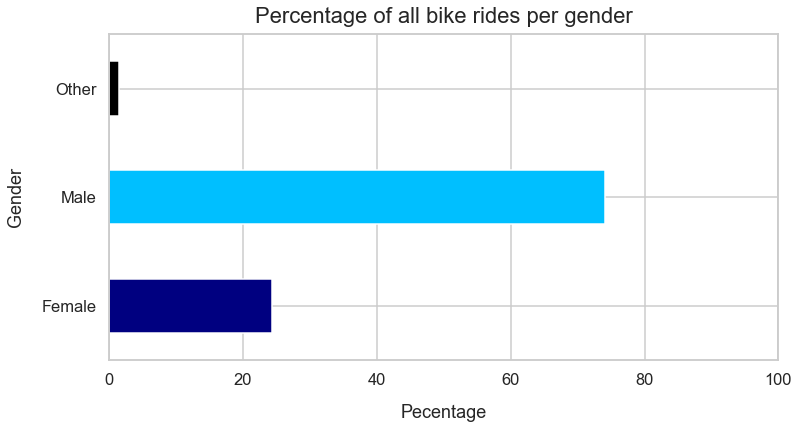

In [10]:
gender_trips = dataFrame.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100


colors = ['navy', 'deepskyblue', 'black']
gender_trips['perc'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('Gender', labelpad=16)
plt.xlabel('Pecentage', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)


## Using Times of GoBike

> Subscribers are most frequently used this service around (7 am - 9 am) and (4 am - 6 pm).
Customers are used this service at weekend around (10 am - 5 pm) and weekday (5 pm - 6 pm). 
Customers use this service during weekend for leisure and weekdays after work.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

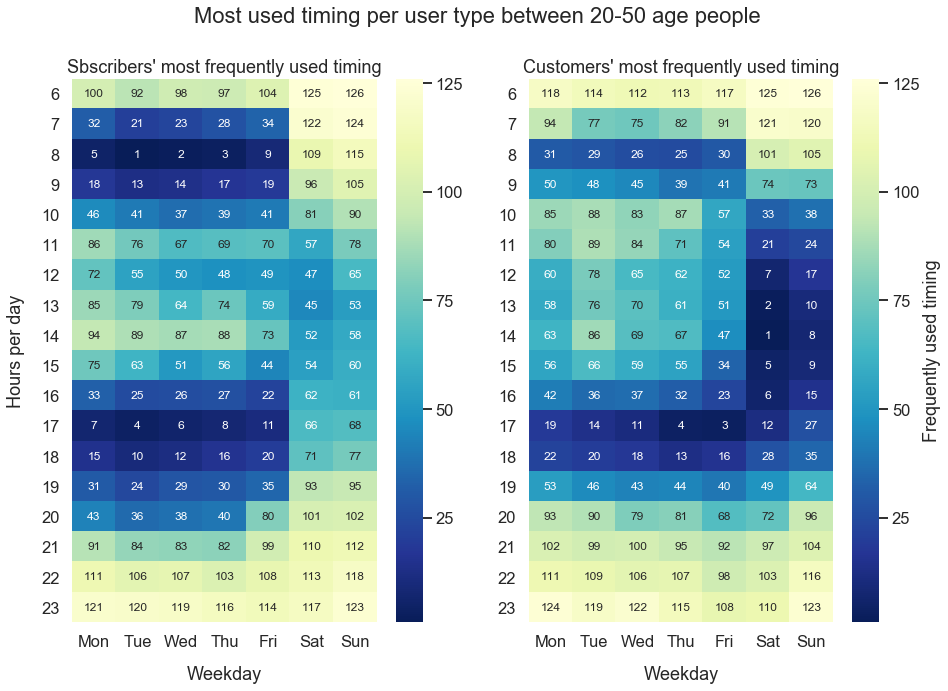

In [11]:
subscriber_hour_dataFrame = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_dataFrame['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_dataFrame['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
subscriber_hour_dataFrame['count_perc'] = subscriber_hour_dataFrame['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)
subscriber_hour_dataFrame['rank'] = subscriber_hour_dataFrame['count_perc'].rank(ascending=False).astype(int)
subscriber_hour_dataFrame_pivoted = subscriber_hour_dataFrame.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
customer_hour_dataFrame = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Customer') 
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
customer_hour_dataFrame['start_time_weekday_abbr'] = pd.Categorical(customer_hour_dataFrame['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
customer_hour_dataFrame['count_perc'] = customer_hour_dataFrame['count'].apply(lambda x: (x/customer_hour_dataFrame['count'].sum())*100) #male
customer_hour_dataFrame['rank'] = customer_hour_dataFrame['count_perc'].rank(ascending=False).astype(int)
customer_hour_dataFrame_pivoted = customer_hour_dataFrame.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank').astype(int)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.suptitle('Most used timing per user type between 20-50 age people', fontsize=22)
sns.heatmap(subscriber_hour_dataFrame_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12})
plt.title("Sbscribers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours per day', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(122)
sns.heatmap(customer_hour_dataFrame_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12}, cbar_kws={'label': 'Frequently used timing'})
plt.title("Customers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)


## Summary

> There have been 3.31 billion rides. 20-30 years previous users ar speedily growing compared to alternative user teams. once the service 1st started 30-40 years previous users were dominant, but 20-30 years previous users became a frontrunner during a year. 20 to 40 years previous individuals took the quite p of motorbike rides. Among those, 30 to 40 years previous people's rides account almost of all bike rides. Male took around %76 of all bike rides, and female took around %24 of them. People use this service on weekdays quite weekends. 8 am and 5 pm ar the peak hours for this service. Also, individuals use this service once they are in mealtime similarly. Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85. Customers' rides appear increasing slightly however subscribers' rides reached 6 times more than customers' on Oct 2018. there's a decrease in Nov 2018 for subscribers however it feels like it's connected with the winter season. Subscribers' average trip length is around 11 minute. Customers' average trip length is around 28 minutes. Subscribers and customers trip distance was regarding constant, that is slightly quite one mile. 90% of motorbike riders turn up on a weekday. The peak bike rides time for all members is around commute time.